In [79]:
import glob
from scipy import stats
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [57]:
files = glob.glob("*.csv")

d = []
prev_time = None

for f in sorted(files):
    print(f)

    df = pd.read_csv(f, parse_dates=["date"]).sort_values(by=["date"], ignore_index=True)
    # df.plot(x="date", y="risepercent")
    max_index = df["risepercent"].idxmax()
    max_rise = df.loc[max_index, "risepercent"]
    start_time = df["date"].iloc[0]
    end_time = df["date"].iloc[-1]
    max_time = df.loc[max_index, "date"]
    duration_hours = (max_time - start_time).total_seconds() / 3600

    if prev_time is None:
        hours_since_prev = None
    else:
        hours_since_prev = (start_time - prev_time).total_seconds() / 3600
        # if hours_since_prev > 50:
        #     hours_since_prev = None

    prev_time = max_time

    # print(start_time, max_rise, duration_hours)
    d.append({
        "start_time": start_time,
        "max_time": max_time,
        "end_time": end_time,
        "rise_percent": max_rise,
        "duration_hours": duration_hours,
        "hours_since_prev": hours_since_prev
    })
    # plt.show()
    # break

dates = [
    "2021-01-26",
    "2021-01-27",
    "2021-01-28",
    "2021-01-29",
    "2021-01-31",
    "2021-02-01",
    "2021-02-02",
    "2021-02-06",
    "2021-02-07",
    "2021-02-08",
    "2021-02-09",
    "2021-02-10",
    "2021-02-11",
]

for date in dates:
    d.append({
        "start_time": pd.to_datetime(date),
    })

df_out = pd.DataFrame(d).sort_values(by=["start_time"], ignore_index=True)
df_out["start_date"] = df_out["start_time"].dt.date
# df_out = df_out.set_index("start_date")

df_out


20210122-032409_20210122-000238.csv
20210122-173029_20210122-155914.csv
20210123-063234_20210123-030001.csv
20210124-212100_20210124-155813.csv
20210125-013238_20210125-060217.csv
20210125-155607_20210125-115332.csv
20210130-065142_20210130-025809.csv
20210130-114525_20210130-133541.csv
20210130-203358_20210130-160218.csv
20210203-232725_20210203-124049.csv
20210204-023831_20210204-081800.csv
20210205-030416_20210205-124638.csv
20210212-005435_20210212-093547.csv
20210212-131454_20210212-162622.csv


,start_time,max_time,end_time,rise_percent,duration_hours,hours_since_prev,start_date
0,2021-01-21 21:52:19,2021-01-22 02:42:03,2021-01-22 09:12:00,108.3333,4.828889,NaN,2021-01-21
1,2021-01-22 13:19:41,2021-01-22 18:21:37,2021-01-22 23:02:19,176.4706,5.032222,10.627222,2021-01-22
2,2021-01-23 00:38:40,2021-01-23 08:03:48,2021-01-23 09:22:59,164.7059,7.418889,6.284167,2021-01-23
3,2021-01-24 15:19:07,2021-01-24 23:01:16,2021-01-25 01:09:34,188.2353,7.702500,31.255278,2021-01-24
4,2021-01-25 01:10:34,2021-01-25 06:23:20,2021-01-25 10:23:56,242.8571,5.212778,2.155000,2021-01-25
5,2021-01-25 10:33:21,2021-01-25 14:53:59,2021-01-25 15:57:07,194.7368,4.343889,4.166944,2021-01-25
6,2021-01-26 00:00:00,NaT,NaT,NaN,NaN,NaN,2021-01-26
7,2021-01-27 00:00:00,NaT,NaT,NaN,NaN,NaN,2021-01-27
8,2021-01-28 00:00:00,NaT,NaT,NaN,NaN,NaN,2021-01-28
9,2021-01-29 00:00:00,NaT,NaT,NaN,NaN,NaN,2021-01-29


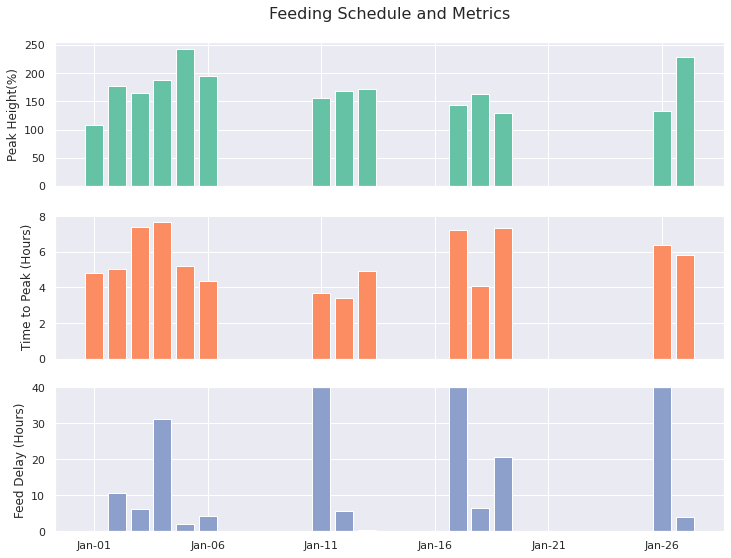

In [72]:
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
ax[0].bar(df_out.index.values, df_out["rise_percent"], color=colors[0])
ax[0].set_ylabel("Peak Height(%)")

ax[1].bar(df_out.index.values, df_out["duration_hours"], color=colors[1])
ax[1].set_ylabel("Time to Peak (Hours)")

ax[2].bar(df_out.index.values, df_out["hours_since_prev"], color=colors[2])
ax[2].set_ylim([0, 40])
ax[2].set_ylabel("Feed Delay (Hours)")

ax[0].set_title("Feeding Schedule and Metrics\n", fontsize=16)
for a in ax:
    a.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

plt.savefig("max-rise-over-time.png")

LinregressResult(slope=-2.8173249101707385, intercept=184.7931510815067, rvalue=-0.11219417358754899, pvalue=0.7025631478477898, stderr=7.203197315938569, intercept_stderr=41.114623408676785)
LinregressResult(slope=-0.3615895243310833, intercept=186.29099444779794, rvalue=-0.5476217127211356, pvalue=0.05271556849194886, stderr=0.166579717506987, intercept_stderr=9.94330815673484)


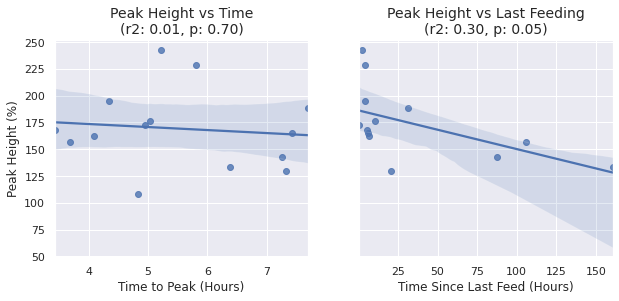

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

s = stats.linregress(df_out["duration_hours"].dropna(), df_out["rise_percent"].dropna())
print(s)

sns.regplot(ax=axes[0], y="rise_percent", x="duration_hours", data=df_out)
axes[0].set_xlabel("Time to Peak (Hours)")
axes[0].set_ylabel("Peak Height (%)")
axes[0].set_title(f"Peak Height vs Time\n(r2: {s.rvalue**2:.2f}, p: {s.pvalue:.2f})", fontsize=14)

s = stats.linregress(df_out["hours_since_prev"].dropna(), df_out["rise_percent"].dropna()[1:])
print(s)

sns.regplot(ax=axes[1], y="rise_percent", x="hours_since_prev", data=df_out)
axes[1].set_xlabel("Time Since Last Feed (Hours)")
axes[1].set_ylabel("")
axes[1].set_title(f"Peak Height vs Last Feeding\n(r2: {s.rvalue**2:.2f}, p: {s.pvalue:.2f})", fontsize=14)

# plt.tight_layout()
plt.savefig("regression.png")
